In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [4]:
# 1. 데이터 로드
file_path = '/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/diabetes.csv'
data = pd.read_csv(file_path)

In [5]:
# 2. BMI를 타겟(label)으로 설정하고, Outcome은 삭제
data = data.drop(columns=['Outcome'])
X = data.drop(columns=['BMI']).values
y = data['BMI'].values.astype(np.float32)

In [6]:
# 3. 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# 4. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 5. 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [9]:
# 6. 모델 정의 (클래스 + forward 함수 방식)
class BMIRegressor(nn.Module):
    def __init__(self):
        super(BMIRegressor, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BMIRegressor().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
# 7. 학습 루프
train_losses = []

for epoch in range(50):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 1060.8271
Epoch 2, Loss: 1025.2555
Epoch 3, Loss: 943.3839
Epoch 4, Loss: 830.6179
Epoch 5, Loss: 643.3320
Epoch 6, Loss: 434.0239
Epoch 7, Loss: 251.3240
Epoch 8, Loss: 137.3258
Epoch 9, Loss: 101.8421
Epoch 10, Loss: 84.9606
Epoch 11, Loss: 89.0477
Epoch 12, Loss: 76.4854
Epoch 13, Loss: 72.2233
Epoch 14, Loss: 71.8515
Epoch 15, Loss: 67.5631
Epoch 16, Loss: 68.1993
Epoch 17, Loss: 66.3062
Epoch 18, Loss: 66.3807
Epoch 19, Loss: 61.1665
Epoch 20, Loss: 62.8286
Epoch 21, Loss: 58.8468
Epoch 22, Loss: 57.3518
Epoch 23, Loss: 57.3573
Epoch 24, Loss: 55.1534
Epoch 25, Loss: 56.0034
Epoch 26, Loss: 53.1131
Epoch 27, Loss: 52.9826
Epoch 28, Loss: 50.5089
Epoch 29, Loss: 50.8420
Epoch 30, Loss: 52.2021
Epoch 31, Loss: 48.0313
Epoch 32, Loss: 48.6666
Epoch 33, Loss: 48.2945
Epoch 34, Loss: 47.8162
Epoch 35, Loss: 52.1479
Epoch 36, Loss: 45.2895
Epoch 37, Loss: 50.2328
Epoch 38, Loss: 47.4737
Epoch 39, Loss: 43.2532
Epoch 40, Loss: 48.4626
Epoch 41, Loss: 43.8278
Epoch 42, Loss

In [11]:
# 8. 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
r2 = r2_score(actuals, preds)
print(f"\nTest MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



Test MSE: 62.9303
R² Score: 0.1147


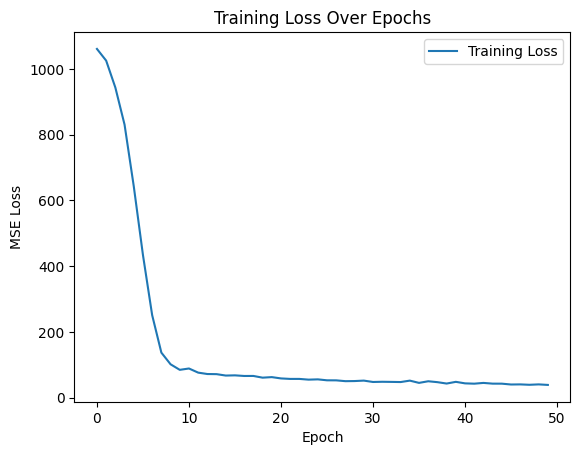

In [12]:
# 9. 학습 Loss 시각화
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [13]:
# nn.Sequential 사용

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [14]:
# 1. 데이터 로드
file_path = '/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/diabetes.csv'
data = pd.read_csv(file_path)


In [15]:
# 2. BMI를 타겟(label)으로 설정하고, Outcome은 제거
data = data.drop(columns=['Outcome'])
X = data.drop(columns=['BMI']).values
y = data['BMI'].values.astype(np.float32)

In [16]:
# 3. 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# 4. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 5. 텐서 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [19]:
# 6. 모델 정의 (nn.Sequential 방식)
input_dim = X_train.shape[1]

class BMIRegressionModel(nn.Module):
    def __init__(self):
        super(BMIRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BMIRegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# 7. 학습 루프
train_losses = []

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 1080.2883
Epoch 2, Loss: 1003.9954
Epoch 3, Loss: 899.0008
Epoch 4, Loss: 738.7672
Epoch 5, Loss: 525.7820
Epoch 6, Loss: 308.5144
Epoch 7, Loss: 162.5974
Epoch 8, Loss: 104.8569
Epoch 9, Loss: 92.0472
Epoch 10, Loss: 86.6223
Epoch 11, Loss: 78.3385
Epoch 12, Loss: 74.5897
Epoch 13, Loss: 71.4158
Epoch 14, Loss: 68.0491
Epoch 15, Loss: 65.6426
Epoch 16, Loss: 68.5510
Epoch 17, Loss: 63.9152
Epoch 18, Loss: 63.1203
Epoch 19, Loss: 60.9927
Epoch 20, Loss: 59.7075
Epoch 21, Loss: 59.5710
Epoch 22, Loss: 57.4056
Epoch 23, Loss: 54.4090
Epoch 24, Loss: 54.2902
Epoch 25, Loss: 53.3356
Epoch 26, Loss: 52.1248
Epoch 27, Loss: 50.9706
Epoch 28, Loss: 50.2694
Epoch 29, Loss: 50.1094
Epoch 30, Loss: 49.0367
Epoch 31, Loss: 47.5391
Epoch 32, Loss: 49.8726
Epoch 33, Loss: 46.2461
Epoch 34, Loss: 46.0658
Epoch 35, Loss: 44.8394
Epoch 36, Loss: 44.9516
Epoch 37, Loss: 46.6447
Epoch 38, Loss: 43.2804
Epoch 39, Loss: 42.7396
Epoch 40, Loss: 42.2225
Epoch 41, Loss: 48.5542
Epoch 42, Loss:

In [22]:
# 8. 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
r2 = r2_score(actuals, preds)
print(f"\nTest MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Test MSE: 62.1724
R² Score: 0.1254


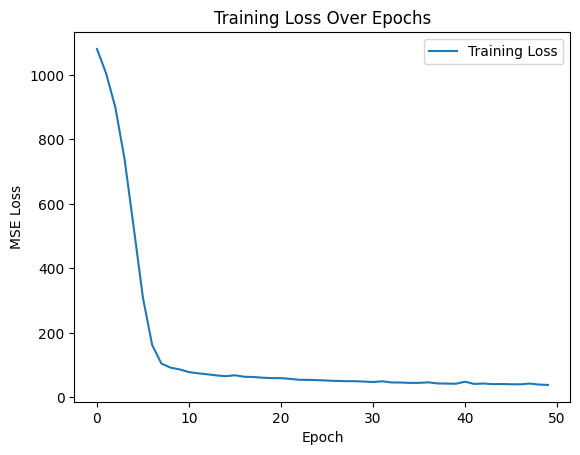

In [23]:
# 9. 학습 Loss 시각화
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()